In [91]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
mpi_df = pd.read_csv("mpi.csv")
seq_df = pd.read_csv("seq.csv")

In [93]:
seq_df['length']=seq_df['length']/1000000
mpi_df['length']=mpi_df['length']/1000000

In [94]:
seq_df['time']=seq_df['time']/1e9
mpi_df['time']=mpi_df['time']/1e9

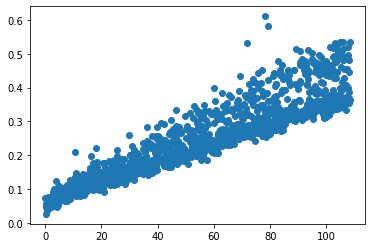

In [95]:
plt.scatter(mpi_df['length'],mpi_df['time'])

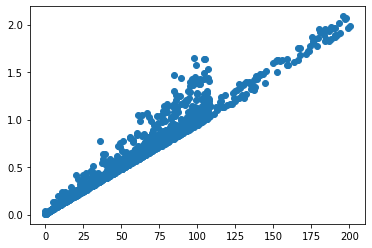

In [97]:
plt.scatter(seq_df['length'],seq_df['time'])

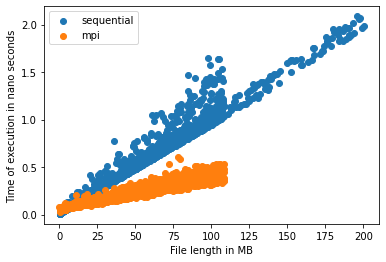

In [98]:
from cProfile import label


fig,ax=plt.subplots()
ax.scatter(seq_df['length'], seq_df['time'], marker="o",label='sequential')
ax.set_xlabel("File length in MB")
ax.set_ylabel("Time of execution in nano seconds")
ax.scatter(mpi_df['length'], mpi_df['time'], marker="o",label='mpi')
plt.legend()
plt.show()


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_sq, X_mpi, Y_sq,Y_mpi = seq_df['length'],mpi_df['length'],seq_df['time'],mpi_df['time']


In [101]:
X_train_seq,X_test_seq,Y_train_seq,Y_test_seq=train_test_split(X_sq,Y_sq)
X_train_mpi,X_test_mpi,Y_train_mpi,Y_test_mpi=train_test_split(X_mpi,Y_mpi)

In [102]:
max_mpi = X_train_mpi.max()
max_seq = X_train_seq.max()

In [103]:
X_train_mpi=X_train_mpi/max_mpi
X_test_mpi=X_test_mpi/max_mpi

In [104]:
X_train_seq=X_train_seq/max_seq
X_test_seq=X_test_seq/max_seq

In [105]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [137]:
i = Input(shape=(1,))
x = Dense(20,activation = 'sigmoid')
x = Dense(1)(i)

model_mpi = Model(i,x)

model_mpi.compile(optimizer='sgd',
        loss='mse')

r=model_mpi.fit(X_train_mpi, Y_train_mpi,
                    validation_data=(X_test_mpi,Y_test_mpi),
                    epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.0078
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 11/50
32/32 [

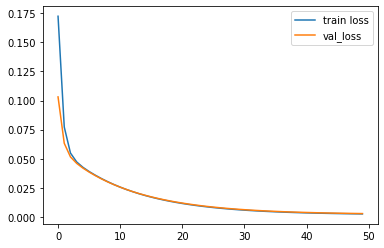

In [131]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [184]:
X_predict_mpi = np.array(range(1,300))

In [185]:
X_predict_mpi_use = X_predict_mpi/max_mpi

In [186]:
Y_predict_mpi=model_mpi.predict(X_predict_mpi_use)

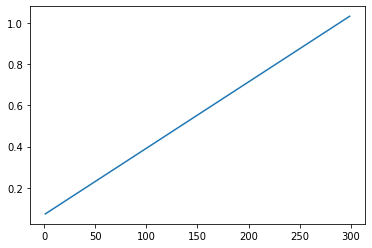

In [187]:
plt.plot(X_predict_mpi,Y_predict_mpi)

In [138]:
i = Input(shape=(1,))
x = Dense(20,activation = 'sigmoid')
x = Dense(1)(i)

model_seq = Model(i,x)

model_seq.compile(optimizer='sgd',
        loss='mse')

r=model_seq.fit(X_train_seq, Y_train_seq,
                    validation_data=(X_test_seq,Y_test_seq),
                    epochs=50)

Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 0.0359 - val_loss: 0.0269
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.0196
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0176
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0168
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0163
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0159
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0155
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0151
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0148
Epoch 10/50
35/35 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0145
Epoch 11/50
35/35 [

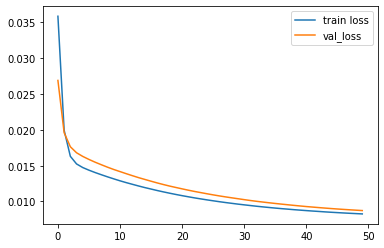

In [139]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [188]:
X_predict_seq = np.array(range(1,300))

In [189]:
X_predict_seq_use=X_predict_seq/max_seq

In [190]:
Y_predict_seq=model_seq.predict(X_predict_seq_use)

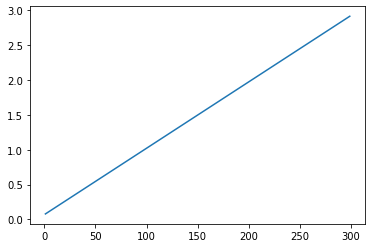

In [191]:
plt.plot(X_predict_seq,Y_predict_seq)

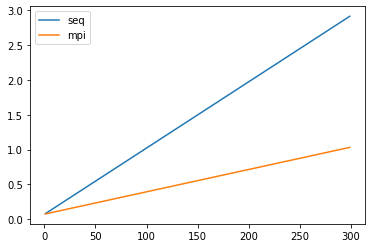

In [192]:
plt.plot(X_predict_seq,Y_predict_seq,label='seq')
plt.plot(X_predict_mpi,Y_predict_mpi,label='mpi')
plt.legend()


In [196]:
model_mpi.predict(np.array([500/max_mpi]).reshape(-1,1))

array([[1.6767597]], dtype=float32)

In [195]:
model_seq.predict(np.array([500/max_seq]).reshape(-1,1))

array([[4.8317027]], dtype=float32)

Lo speed up ottenuto è pari a 3, inferiore a quello ideale (4)